# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [92]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [94]:
# Check for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [95]:
# Check for duplicate
df.duplicated().sum()
# Drop duplicate
df = df.drop_duplicates()

In [96]:
# Check for unique flight days
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [97]:
# Mapping the flight day names into numbers
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

df["flight_day"].sample(7)

C:\Users\bonas\AppData\Local\Temp\ipykernel_17916\3260892355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["flight_day"] = df["flight_day"].map(mapping)


36465    2
11671    6
1116     7
29253    4
19981    4
19131    6
47944    6
Name: flight_day, dtype: int64

In [98]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [109]:
df_copy = df.drop(columns=['route', 'booking_origin', 'num_passengers']).copy()

In [110]:
# Dummy Variable Encoding for categorical variables
df_encoded = pd.get_dummies(df_copy, drop_first=True)
df_encoded

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,262,19,7,6,1,0,0,5.52,0,False,False,True
1,112,20,3,6,0,0,0,5.52,0,False,False,True
2,243,22,17,3,1,1,0,5.52,0,False,False,True
3,96,31,4,6,0,0,1,5.52,0,False,False,True
4,68,22,15,3,1,0,1,5.52,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,6,9,6,1,0,1,5.62,0,False,False,True
49996,111,6,4,7,0,0,0,5.62,0,False,False,True
49997,24,6,22,6,0,0,1,5.62,0,False,False,True
49998,15,6,11,1,1,0,1,5.62,0,False,False,True


In [101]:
# Convert boolean values to int (1's and 0's)
df_encoded = df_encoded.astype(int)
# moving target column to last column
target_column = 'booking_complete'
df_encoded = df_encoded[[col for col in df_encoded.columns if col != target_column] + [target_column]]
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,2,262,19,7,6,1,0,0,5,0,0,1,0
1,1,112,20,3,6,0,0,0,5,0,0,1,0
2,2,243,22,17,3,1,1,0,5,0,0,1,0
3,1,96,31,4,6,0,0,1,5,0,0,1,0
4,2,68,22,15,3,1,0,1,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5,0,0,1,0
49996,1,111,6,4,7,0,0,0,5,0,0,1,0
49997,1,24,6,22,6,0,0,1,5,0,0,1,0
49998,1,15,6,11,1,1,0,1,5,0,0,1,0


# Bivariate analysis
## Checking for linearity

To ensure accurate predictions, we need to assess the linearity between predictor and response variables. This can be done by visualizing scatter plots to identify linear trends. If non-linearity is present, a linear regression model may not be suitable.

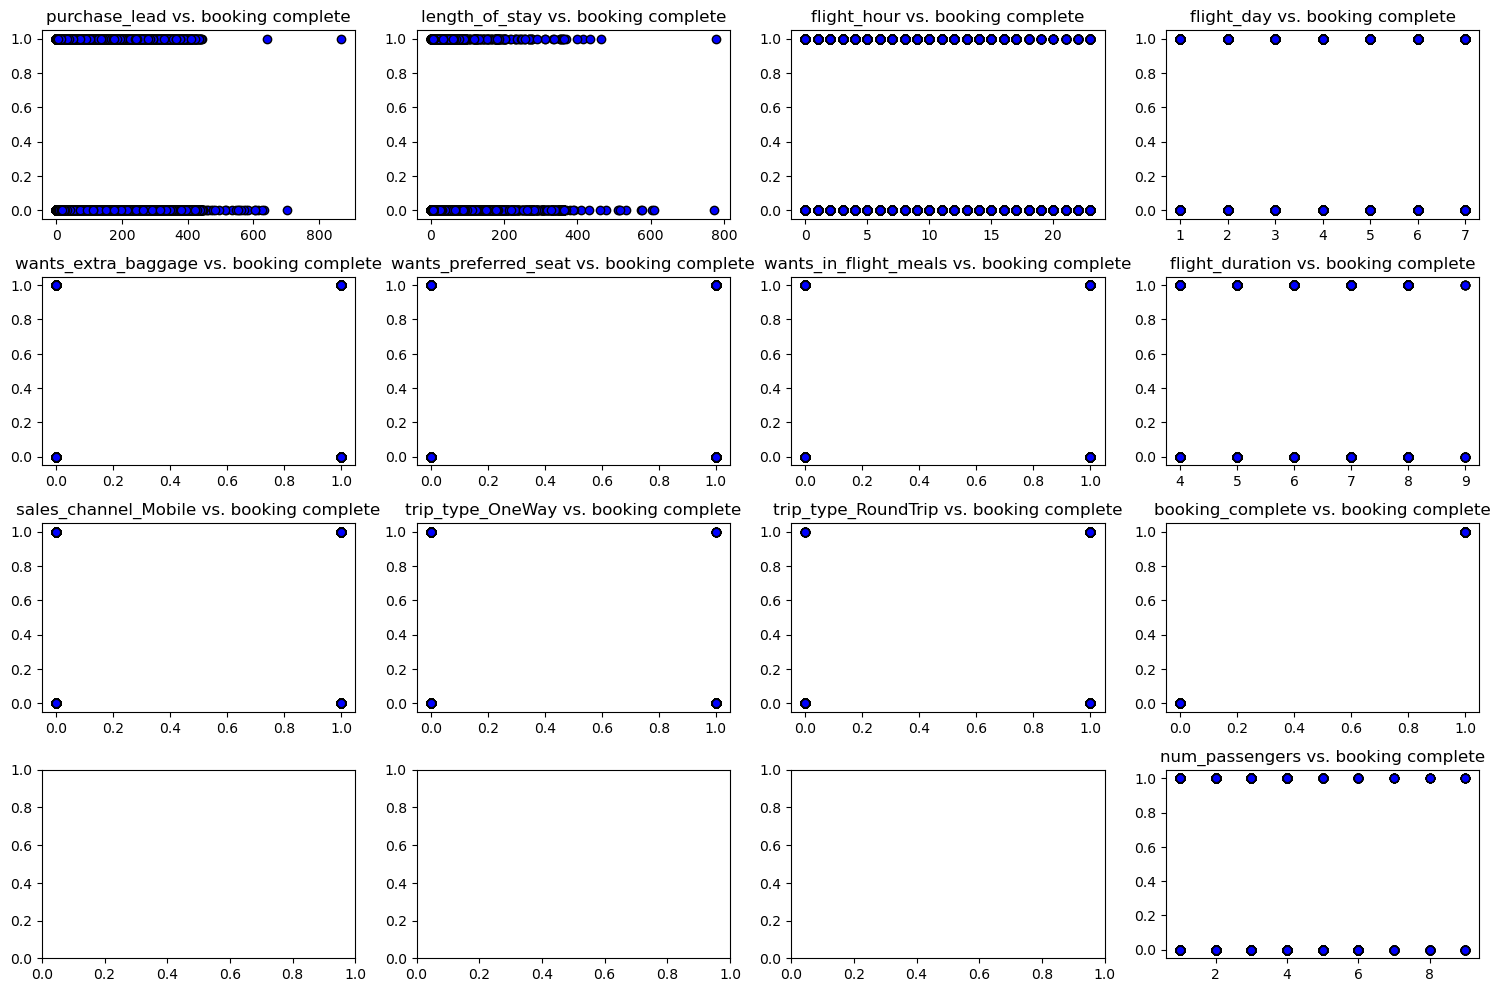

In [102]:
fig, axs = plt.subplots(4,4, figsize=(15,10),)
fig.subplots_adjust(hspace = 0.1, wspace=.8)
axs = axs.ravel()

for index, column in enumerate(df_encoded.columns):
    axs[index-1].set_title("{} vs. booking complete".format(column),fontsize=12)
    axs[index-1].scatter(x=df_encoded[column],y=df_encoded['booking_complete'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [103]:
# We only compare the predictor variables, and thus drop the target `mpg` column.
corr = df_encoded.corr()

# Target correlaton with each feature
target_correlation = corr['booking_complete'].drop('booking_complete')

target_correlation

num_passengers           0.024092
purchase_lead           -0.022132
length_of_stay          -0.042080
flight_hour              0.006705
flight_day              -0.007061
wants_extra_baggage      0.068452
wants_preferred_seat     0.050189
wants_in_flight_meals    0.026399
flight_duration         -0.101219
sales_channel_Mobile    -0.039320
trip_type_OneWay        -0.024428
trip_type_RoundTrip      0.028462
Name: booking_complete, dtype: float64

## Multicolinearity
### Pairplot

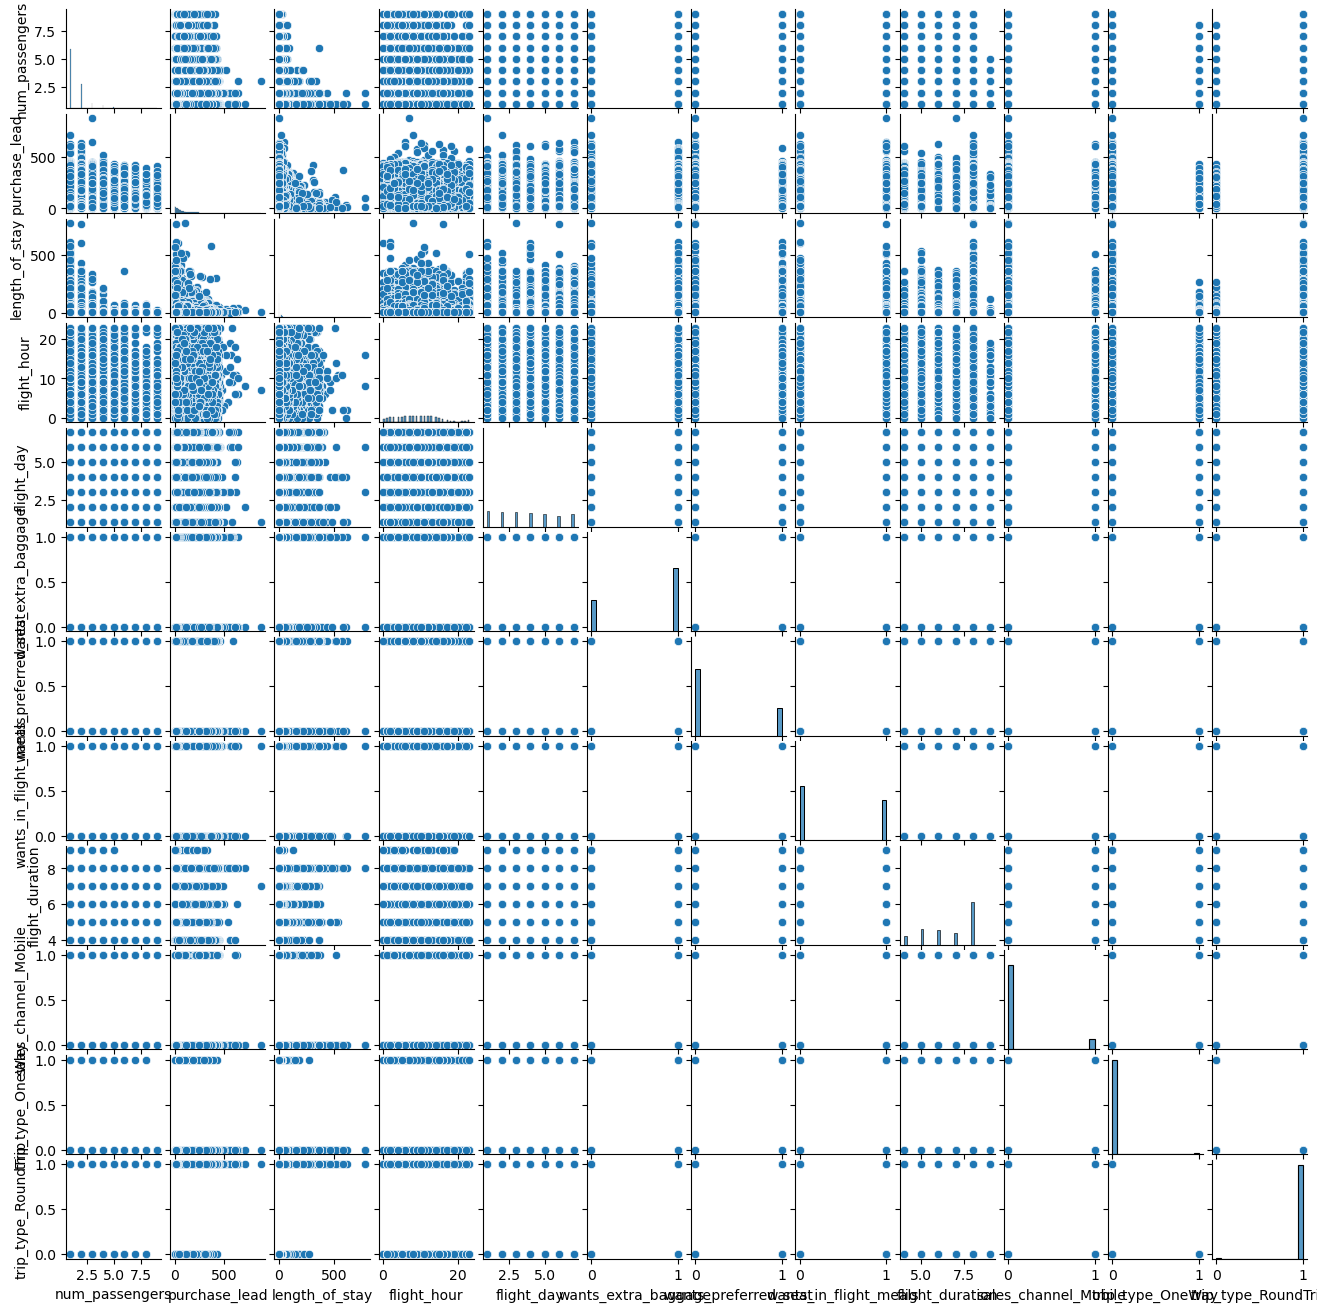

In [104]:
from seaborn import pairplot
g = pairplot(df_encoded.drop('booking_complete', axis='columns'))
g.fig.set_size_inches(13,13)

### Correlation matrix

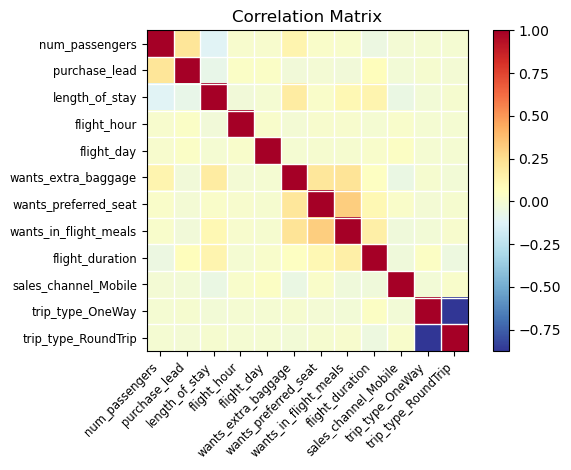

In [105]:
from statsmodels.graphics.correlation import plot_corr

# exclude target (booking complete)
corr = df_encoded.drop('booking_complete', axis='columns').corr()
fig=plot_corr(corr,xnames=corr.columns)

### Scalling

Using a standard scaler to normalize features to allow for machine learning algorithyms to perform effectively.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing standardscaler to normalize features
scaler = StandardScaler()

# Standardizing features for training and testing features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling
#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Random forest classifier accuracy: {accuracy:.2}')


Random forest classifier accuracy: 0.84


In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient boosting classifier accuracy: {accuracy:.2}')

Gradient boosting classifier accuracy: 0.85


In [124]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear', C=1)
svc_clf.fit(X_train, y_train)

y_pred = svc_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Support vector classifier accuracy: {accuracy:.2}')

Support vector classifier accuracy: 0.85


In [125]:
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
